In [100]:
# -*- coding: utf-8 -*-
import torch
import math
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_friedman1, make_friedman3
from tqdm import trange

# Exercici de Regressió

En aquest primer exercici el que es demana és que repetiu el mateix procés que el tutorial però en un problema una mica més complicat. La vostra xarxa haurà de tenir alguna capa més.

## Generació de les dades
Emprarem un conjunt de dades que s'autogenera a partir de certs paràmetres, la variable a predir es correspon amb la següent fórmula:

$y(X) = 10 * \sin(\pi * X[0] * X[1]) + 20 * (X[2] - 0.5)^2 + 10 * X[3] + 5 * X[4] + noise * N(0, 1).$

Com podeu observar tenim 5 variables útils i les altres que són independents de `y`.

[Més informació](https://projecteuclid.org/journals/annals-of-statistics/volume-19/issue-1/Multivariate-Adaptive-Regression-Splines/10.1214/aos/1176347963.full)

**ToDo**

- En aquesta passa només heu de separar les dades en conjunt d'entrenament i test. Les etiquetes del conjunt de test s'han de dir `y_test`.


In [120]:
X, y = make_friedman1(n_samples=2000, n_features=10, noise=0.0, random_state=33)


X = torch.from_numpy(X)
y = torch.from_numpy(y)
X = X.float()
y = y.float()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([1600, 10]),
 torch.Size([400, 10]),
 torch.Size([1600]),
 torch.Size([400]))

## Definició de la xarxa

**ToDo**
- Heu de definir la xarxa amb la qual voleu treballar, provau amb diferents arquitectures.
- Heu de definir la funció de pèrdua, podeu emprar MSE.

In [171]:
model = torch.nn.Sequential(
    torch.nn.Linear(X_train.shape[1], 64),
    torch.nn.ReLU(),
    torch.nn.Linear(64, 16),
    torch.nn.Sigmoid(),
    torch.nn.Linear(16, 32),
    torch.nn.ReLU(),
    torch.nn.Linear(32, 1),
    torch.nn.Flatten(0, 1),
)

# Print number of parameters
pytorch_total_params = sum(p.numel() for p in model.parameters())
print(pytorch_total_params)

loss_fn = torch.nn.MSELoss(reduction="sum")

#loss_fn = torch.nn.cross_entropy_loss(reduction="sum")


lr = 1e-6

optimizer = optim.SGD(model.parameters(), lr=lr)

2321


## Entrenament

En aquesta part heu de definir el bucle d'entrenament:

**ToDo**

  - Predicció.
  - Càlcul de la funció de pèrdua.
  - Càlcul del descens del gradient.

Volem veure un gràfic on es mostri el valor de la funció de pèrdua pel conjunt d'entrenament i del conjunt de test a cada iteració.


Training: 100%|██████████| 50000/50000 [02:50<00:00, 292.62it/s]


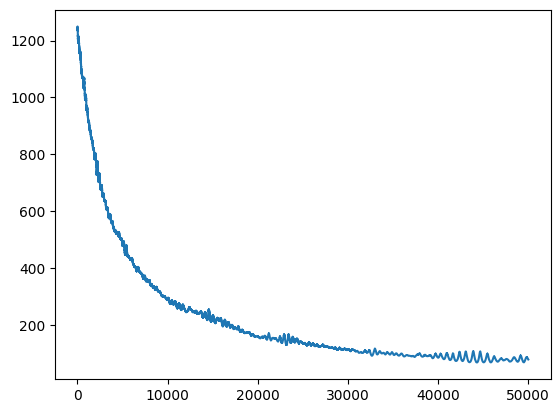

In [175]:
losses = []
num_of_iters = 50000

for t in trange(num_of_iters, desc="Training", leave=True):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    losses.append(loss.item())
    model.zero_grad()
    loss.backward()
    with torch.no_grad():
        optimizer.step()

plt.plot(losses)
plt.show()

## Resultats

**ToDo**
- Dibuixar el gràfic emprant un gràfic on podrem comparar com de bons són els nostres resultats respecte els

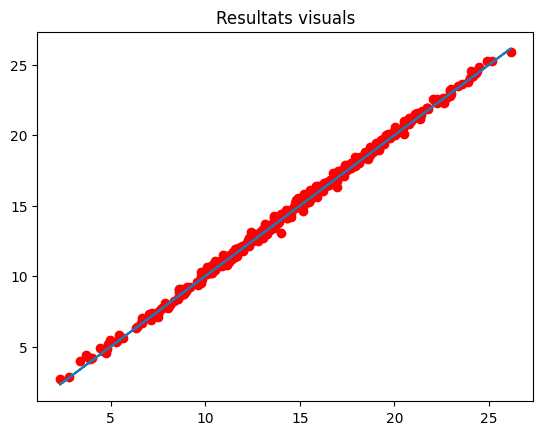

In [176]:
y_pred = model(X_test)

plt.title("Resultats visuals")
plt.scatter(y_test, y_pred.detach().numpy(), c="red")
plt.plot(y_test, y_test)
plt.show()